# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_df = study_results.merge(mouse_metadata, how='inner', on='Mouse ID')

# Display the data table for preview
full_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(full_df['Mouse ID'].value_counts())

249

In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = full_df[full_df.duplicated(subset=['Mouse ID', 'Timepoint'])]

duplicate_mice = duplicate_rows['Mouse ID'].unique()

duplicate_mice 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = full_df.loc[full_df['Mouse ID'] != 'g989']

In [28]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
stdev = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
'Mean': mean,
'Median': median,
'Variance': var,
'Std. Dev.': stdev,
'Std. Err.': sem
})
summary_df

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

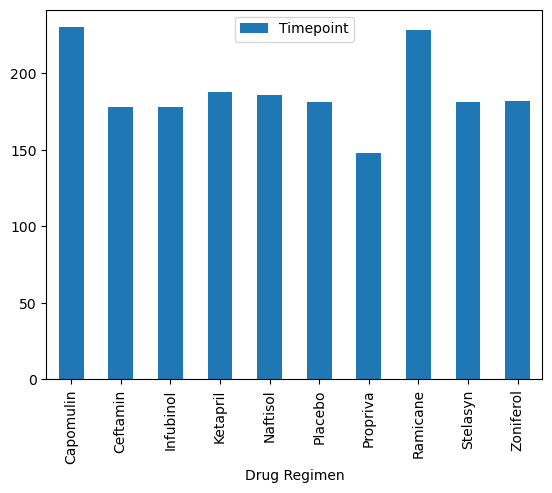

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_df = cleaned_df.groupby('Drug Regimen')['Timepoint'].count().reset_index()

timepoint_df.plot.bar(x='Drug Regimen', y='Timepoint')

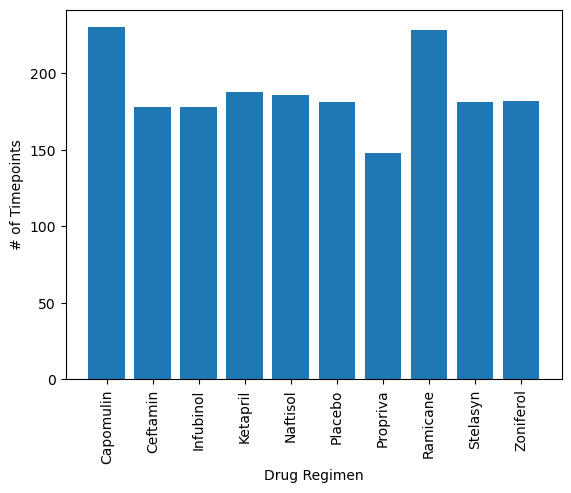

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_df['Drug Regimen'], timepoint_df['Timepoint'])
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.xticks(rotation=90)

plt.show()

<Axes: ylabel='count'>

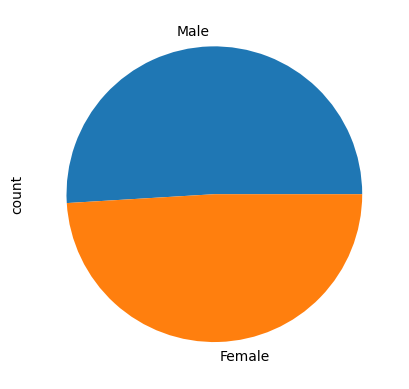

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data = cleaned_df['Sex'].value_counts()
label = cleaned_df['Sex'].unique()

data.plot.pie(y=label)

([<matplotlib.patches.Wedge at 0x1debd5655a0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Female'),
  Text(0.033082014082615095, -1.0995024239828841, 'Male')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

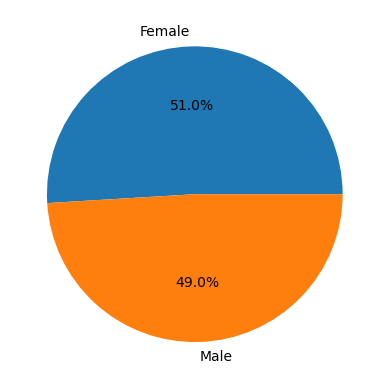

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(data,autopct="%1.1f%%",labels = label)

## Quartiles, Outliers and Boxplots

In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finalTumorByRegimen = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin') | \
                                    (cleaned_df['Drug Regimen'] == 'Ramicane') | \
                                    (cleaned_df['Drug Regimen'] == 'Infubinol') | \
                                    (cleaned_df['Drug Regimen'] == 'Ceftamin')
                                    ]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = final_tumor_miceDF.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged_df = finalTumorByRegimen.merge(final_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
final_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,c326,5,36.321346,0,Infubinol,Female,18,25
2,c139,45,72.226731,2,Infubinol,Male,11,28
3,v339,5,46.250112,0,Infubinol,Male,20,26
4,a577,30,57.031862,2,Infubinol,Female,6,25


In [105]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(final_merged_df['Drug Regimen'].unique())

quartiles = final_merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    iqr = quartiles[treatment][0.75] - quartiles[treatment][0.25]
    lower = quartiles[treatment][0.25] - 1.5 * iqr
    upper = quartiles[treatment][0.75] + 1.5 * iqr
    lower_outliers = final_merged_df.loc[(final_merged_df['Tumor Volume (mm3)'] < lower) == True]
    upper_outliers = final_merged_df.loc[(final_merged_df['Tumor Volume (mm3)'] > upper) == True]
print(f"Outliers are {lower_outliers['Mouse ID']}{upper_outliers['Mouse ID']}")

Outliers are 21    k403
78    s185
Name: Mouse ID, dtype: objectSeries([], Name: Mouse ID, dtype: object)


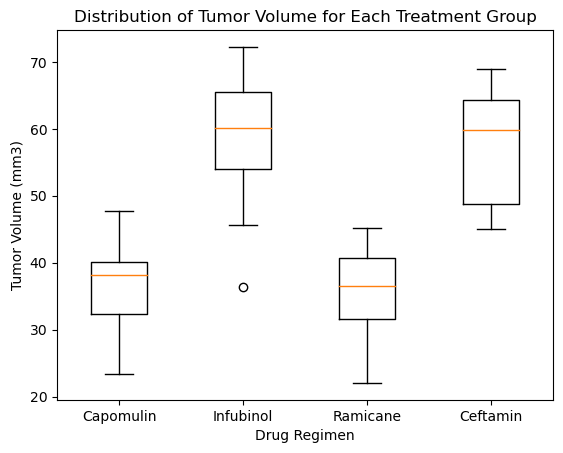

In [101]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [final_merged_df.loc[final_merged_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]
plt.boxplot(tumor_vol_data, labels=treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.show()

## Line and Scatter Plots

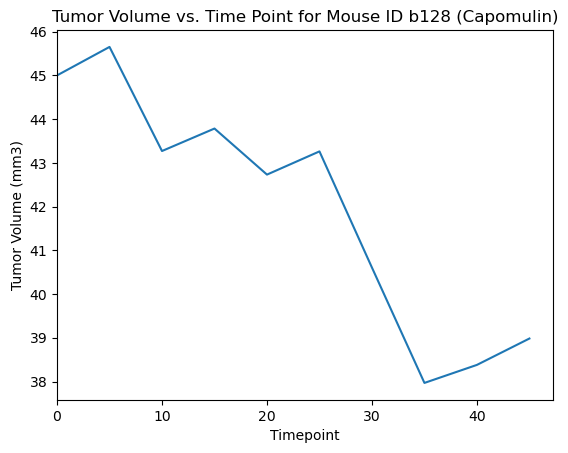

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_data = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
mouse_id = 'b128'
mouse_data = cap_data.loc[cap_data['Mouse ID'] == mouse_id]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)')
plt.xlim(mouse_data['Timepoint'].min())

plt.show()

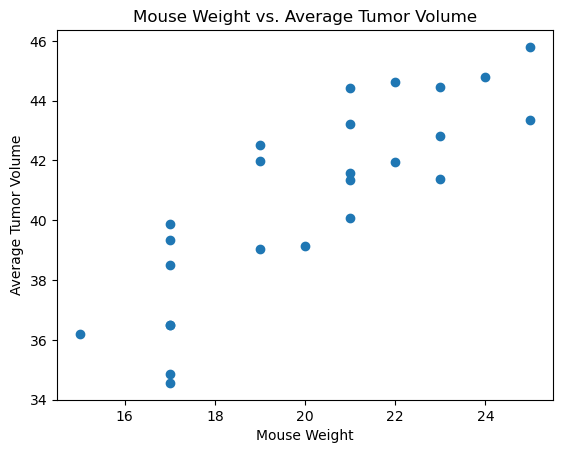

In [112]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_vol = cap_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = cap_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Mouse Weight vs. Average Tumor Volume')

plt.show()

## Correlation and Regression

In [119]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouse_weight, avg_tumor_vol)

print(f"The correlation coefficient is: {rvalue}")

The correlation coefficient is: 0.8419363424694721
